In [20]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.cluster.hierarchy import linkage, dendrogram
from nltk.cluster import KMeansClusterer, GAAClusterer, EMClusterer, euclidean_distance
from pyclustertend import hopkins

In [21]:
scaler = StandardScaler(with_mean=False)
svd = TruncatedSVD(n_components=100, random_state=42)
tsne = TSNE(n_components=2, random_state=42, perplexity=50)

k_means_clusterer = KMeansClusterer(5, euclidean_distance, repeats=3, normalise=True, avoid_empty_clusters=True)
agglomerative_clusterer = GAAClusterer(5)
em_clusterer = EMClusterer(np.zeros(5), normalise=True)

pipe = Pipeline([
    ('scaler', scaler),
    ('svd', svd),
])

save_dir = 'saved_models/w2v_d2v_kwords_lemmatize/'
with open(os.path.join(save_dir, 'vectors.pickle'), 'rb') as handle:
    vectors = pickle.load(handle)

In [34]:
for key in vectors.keys():
    if 'tf-idf' in key:
        transformed = pipe.fit_transform(vectors[key])
        
        kmeans_clusters = k_means_clusterer.cluster(transformed, assign_clusters=True)
        agg_clusters = agglomerative_clusterer.cluster(transformed, assign_clusters=True)
        em_clusters = em_clusterer.cluster(transformed, assign_clusters=True)
        
        tsne_reduced = tsne(transformed)
        
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(7,20))
        
        ax1.scatter(tsne_reduced[:, 0], tsne_reduced[:, 1], c=kmeans_clusters, cmap='rainbow')
        ax1.set_title('KMeans')
        ax2.scatter(tsne_reduced[:, 0], tsne_reduced[:, 1], c=agg_clusters, cmap='rainbow')
        ax2.set_title('Agglomerative')
        ax3.scatter(tsne_reduced[:, 0], tsne_reduced[:, 1], c=em_clusters, cmap='rainbow')
        ax3.set_title('EM')
        
        fig.show()


/home/fassty/anaconda3/envs/deep_learning/lib/python3.7/site-packages/nltk/cluster/util.py:114: RuntimeWarning: invalid value encountered in true_divide
  return vector / sqrt(numpy.dot(vector, vector))


KeyboardInterrupt: 

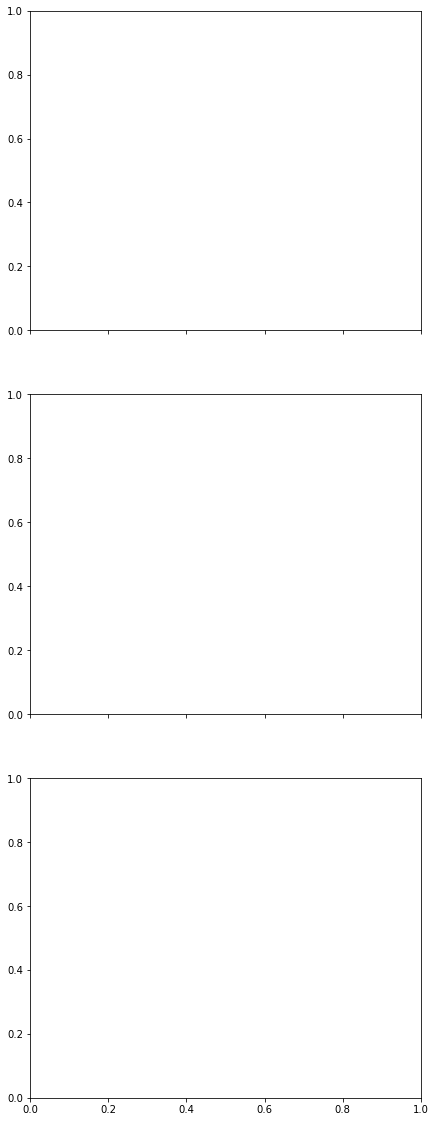

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(7,20))